In [1]:
import numpy as np
import pandas as pd

In [2]:
df_Q4 = pd.read_csv("/Users/snowe/Desktop/Tech_Workers_Mental_Health/Data/Q4.csv")
df_Q4.head(5)

,Survey Year,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.
0,2017,0,100-500,1.0,1.0,No,Yes,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN,They don't take it seriously
1,2017,0,100-500,1.0,1.0,Yes,Yes,31.0,Male,United Kingdom,NaN,NaN,United Kingdom,NaN,"raise awareness, talk about it to lessen the s..."
2,2017,0,6-25,1.0,1.0,I don't know,No,36.0,Male,United States of America,Missouri,White,United States of America,Missouri,"Education and awareness, statistics, add suppo..."
3,2017,0,More than 1000,1.0,1.0,Yes,Yes,22.0,Male,United States of America,Washington,White,United States of America,Washington,"More support, less burnout and death marches"
4,2017,0,100-500,1.0,0.0,Yes,No,30.0,Male,United States of America,California,White,United States of America,California,"Awareness, changed work schedules and expectat..."


In [3]:
Q4 = df_Q4.iloc[:,-1]

In [4]:
Q4 = Q4.to_frame()

In [5]:
Q4 = Q4.dropna()

In [11]:
Q4 = [i for i in Q4.iloc[:,0]]

AttributeError: 'list' object has no attribute 'iloc'

In [15]:
Q4

["They don't take it seriously",
 'raise awareness, talk about it to lessen the stigma',
 'Education and awareness, statistics, add supportive writing to the company handbook',
 'More support, less burnout and death marches',
 'Awareness, changed work schedules and expectations',
 'Be more vocal about supporting employees with issues, and supporting mental health time off.',
 "I think we over work ourselves and each other. We expect everyone to be connected all the time and humans just weren't meant to work to this degree. We need to cut each other more slack",
 'Don’t know ',
 'Be open about talking about and open about accommodations for it and stop pushing workers toward burnout. ',
 "Make employees more aware of any programs they have options to, STOP firing people that have these problems rather then deal with it. Realize that just because someone might miss a lot of work its not because they are lazy. With me its because of stress and depression. My job is almost nothing but pres

In [7]:
import string
#import packages from nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist
#import gensim and packages
import gensim
from gensim import corpora

In [8]:
#check the most frequent words
NLTK_stopwords = stopwords.words('english')

text = [word for line in Q4 for word in line.split() 
        if word not in NLTK_stopwords]
fdist = FreqDist(text)
k = 20
top_k_words, _ = zip(*fdist.most_common(k))
print(top_k_words)

('mental', 'health', 'I', 'people', 'work', 'think', 'issues', 'employees', 'support', 'industry', 'open', 'time', 'tech', 'like', 'would', 'physical', 'need', 'More', 'talk', 'make')


In [9]:
#create a custom stopwords list
custom_stopwords = ['mental', 'health', 'I', 'people', 'work', 
                    'think', 'issues', 'employees', 'support', 
                    'industry', 'time', 'tech', 'like', 'would', 
                    'physical', 'need', 'More', 'talk', 'make']

stop = NLTK_stopwords + custom_stopwords

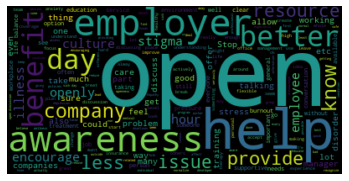

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

textQ4 = " ".join(i for i in Q4)
wordcloudQ4 = WordCloud(stopwords = stop).generate(textQ4)

plt.imshow(wordcloudQ4, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloudQ4.png')
plt.show()

In [62]:
from nltk.corpus import stopwords

NLTK_stop = stopwords.words('english')
custom_stopwords = ['na', 'skip', 'nil', 'gqcfvq', 'fff', 'bfdzd']
stop = set(NLTK_stop + custom_stopwords)

def remove_stopwords(data):
    output_list = []
    for sentence in data:
        temp_list = []
        for word in sentence.split():
            if word.lower() not in stop:
                temp_list.append(word)
        output_list.append(' '.join(temp_list))
    return output_list

doc = remove_stopwords(Q4)

print(doc)

['take seriously', 'raise awareness, talk lessen stigma', 'Education awareness, statistics, add supportive writing company handbook', 'support, less burnout death marches', 'Awareness, changed work schedules expectations', 'vocal supporting employees issues, supporting mental health time off.', 'think work other. expect everyone connected time humans meant work degree. need cut slack', 'Don’t know', 'open talking open accommodations stop pushing workers toward burnout.', "Make employees aware programs options to, STOP firing people problems rather deal it. Realize someone might miss lot work lazy. stress depression. job almost nothing pressure/stress trying make everything perfect. I'm QA entire companies software dependability rests shoulders alone.", 'think opportunity mental health sick leave important normal sick leave. Also, burnout huge issue tech.', 'People talk enough. enough mental health initiatives tech compared others (e.g. diversity & inclusion).', 'awareness ability find 

In [63]:
from bertopic import BERTopic

model = BERTopic(verbose=True)
topics, probabilities = model.fit_transform(doc)

2022-04-26 16:59:08,075 - BERTopic - Transformed documents to Embeddings


2022-04-26 16:59:11,524 - BERTopic - Reduced dimensionality with UMAP
2022-04-26 16:59:11,581 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [64]:
model.get_topic_freq().head(11)

,Topic,Count
0,0,1032
1,1,41
2,2,27


In [65]:
model.get_topic(0)

[('health', 0.08533105505916139),
 ('mental', 0.08345669221828057),
 ('work', 0.049572530925628897),
 ('people', 0.04844234931620216),
 ('issues', 0.04375189692846188),
 ('employees', 0.03662281721839057),
 ('think', 0.03286224238730059),
 ('support', 0.03197801107337579),
 ('industry', 0.0312621086982116),
 ('talk', 0.029437467103369985)]

In [66]:
model.get_topic(1)

[('know', 0.8985099606923632),
 ('dont', 0.6634538816646646),
 ('sure', 0.5913449955107475),
 ('idea', 0.5634784384456343),
 ('idk', 0.3780331059114724),
 ('clue', 0.2657599783055113),
 ('yes', 0.2520220706076482),
 ('im', 0.19138438777477407),
 ('qualified', 0.14462490967459737),
 ('duh', 0.14462490967459737)]

In [67]:
model.get_topic(2)

[('na', 2.8442898902670817),
 ('view', 2.613306453337527),
 ('none', 2.478217027641874),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05)]

In [68]:
model.get_topic(3)

False

In [69]:
model.visualize_topics()

/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1590: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.



TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.